<h1>PAM2Py version 5.0 - JupyterHub</h1>
<img src="Logos/jonas_logo.png"><p></p>
Click the "Run" Button above to call the Python code and run the GUI. 
Input files are to be <em>uploaded</em> to the server and can be one of the following types:
<ul>
    <li>Sound WAV files (experimental data)</li>
    <li>Sound FLAC files (experimental data)</li>
    <li>Matlab MAT files (numerical data)</li>
</ul>
This version uses a Chebyshev filter of type I and order 4, with a ripple of 0.15 dB (see IEC 61260). 
The GUI will process <em>a single file</em> at a time, 
and the number of uploads (not the number of files) will be shown next to the upload button. 
The calculation results are shown in the Log window, which should be activated from the start. 
The MAT files should contain the following variables: 
<ul>
  <li>depth</li>              
  <li>frequency</li>              
  <li>frequency_band_definition</li>             
  <li>frequency_count</li>          
  <li>latitude</li>           
  <li>longitude</li>            
  <li>percentile_list</li>         
  <li>spl_values</li>        
  <li>time</li>          
  <li>total_number_of_grid_points</li>    
</ul>
The GUI allows to define metadata for both experimental and numerical data; the different types of metadata are described in the JONAS Exchange Data Format Proposal. Output CSV and EDF files are written to the server, you need to download then to your hard drive. 
You can get the standalone version of PAM2Py <a href="https://github.com/BochicTrdar/PAM2Py">here</a>.

In [3]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


Accordion(children=(VBox(children=(HBox(children=(FileUpload(value={}, accept='.wav,.flac', description='Selec…

Analysis type: PSD
Plot type: Time
Measurement: In-air.
Uncalibrated analysis. Output in relative units.
System sensitivity correction factor S = 0.0 dB
Preamplifier gain, G = 0.0 dB
ADC peak voltage, vADC = 1.4142 V
Sampling frequency, Fs = 100 Hz
Time segment length: 100 samples = 1.0 s
Window function: None
Time segment overlap: 50.0 %
Welch factor = 0
Computing PSD...
Plotting...


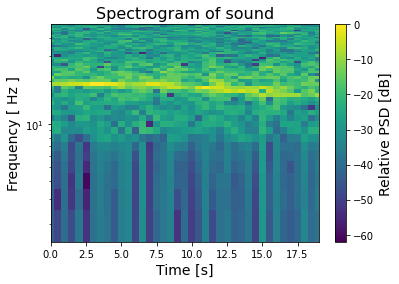

Done.


In [3]:
# PAM2Py Python ToolBox - ipywidgets
# Version 5.0
# JONAS Project 
# Written by Orlando Camargo Rodriguez
# Based on PAMGuide.m by Nathan D. Merchant
# Faro, Seg Mai  9 20:04:39 WEST 2022
#==========================================================================
# Don't like it? Don't use it...
#==========================================================================

# https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
# pip install h5py
import ipywidgets as widgets
from ipywidgets import Layout
# Numpy and Scipy stuff:
from numpy import *
from scipy.io import loadmat
# Matplotlib: 
from matplotlib.pyplot import *
# OS stuff
import os
from PG_Func   import *
from write_edf import *
#======================================================================
# Function to run the analysis:
def run_analysis(a):
    if ( sndfile.value == {} ):
        display('Error: Select a sound file first...')        
    elif ( ao8.value == ' ' ):
        display('Error: Specify a High Frequency...')
    else:
         ifile = 'soundfile'
         uploaded_filename = next(iter(sndfile.value))
         content = sndfile.value[uploaded_filename]['content']
         filetype = uploaded_filename[-4:]
         if filetype == '.wav':
            filename = uploaded_filename[:-4]
         else:
            filename = uploaded_filename[:-5]
         with open(ifile, 'wb') as f: f.write(content)
         atype    = ao1.value
         ctype    = co2.value
         plottype = ao3.value
         envi     = co1.value
         winname  = ao2.value
         Si       = float( co3.value )
         Mh       = float( co4.value )
         G        = float( co5.value )
         vADC     = float( co6.value )
         r        = float( ao5.value )*0.01
         wlength  = float( ao6.value )
         lcut     = float( ao7.value )
         hcut     = float( ao8.value )
         welch    = float( ao9.value )
         S        = ao4.value 
         if ( S == 'Logarithmic' ):
              linlog = 0
         else:
              linlog = 1
         thechannel = 0
         PG_Func(ifile,atype,plottype,envi,ctype,Si,Mh,G,vADC,r,wlength,winname,lcut,hcut,welch,linlog,thechannel)
    return
#======================================================================
# Function to write the *.csv (experimental data only):
def write_csv(a):
    if os.path.exists('Aft.mat') == 0:
       print('Calculate SPL values first...')
    else:
       uploaded_filename = next(iter(sndfile.value))
       filetype = uploaded_filename[-4:]
       if filetype == '.wav':
          filename = uploaded_filename[:-4]
       else:
         filename = uploaded_filename[:-5]
       csvfile = filename + '.csv' 
       matlab_data = loadmat('Aft.mat',squeeze_me=True)
       frequency   = matlab_data['f']
       time        = matlab_data['t']
       spl_values  = matlab_data['A']
       cA = frequency.size
       rA =      time.size
       data = zeros((rA+1,cA+1))
       data[1:,0] = time
       data[0,1:] = frequency
       data[1:,1:] = spl_values
       savetxt(csvfile, data, delimiter=',', fmt='%f')
       csvmessage = 'Frequency, Time and SPL values written to ' + csvfile
       print(csvmessage)
    return
#======================================================================
# Function to write the *.edf for experimental data:
def write_edfe(a):
    format_version  =  mo1.value # 1
    author          =  mo2.value # 2
    institution     =  mo3.value # 3
    country_code    =  mo4.value # 4
    contact         =  mo5.value # 5
    start_date      =  mo6.value # 6
    end_date        =  mo7.value # 7
    date_of_creation=  mo8.value # 8
    purpose         =  mo9.value # 9
    data_uuid       = mo10.value # 10
    data_type       = mo11.value # 11
    comments        = mo12.value # 12
    expsetup        = mo13.value # 13
    recorder_manufacturer    = mo14.value # 14 
    recorder_serial_number   = mo15.value # 15
    recorder_model           = mo16.value # 16
    builtin_hydrophone       = mo17.value # 17
    hydrophone_manufacturer  = mo18.value # 18
    hydrophone_sensitivity   = mo19.value # 19
    hydrophone_serial_number = mo20.value # 20
    hydrophone_model         = mo21.value # 21
    averaging_time           = mo22.value # 22
    calibration_datetime     = mo23.value # 23
    calibration_factor       = mo24.value # 24
    calibration_procedure    = mo25.value # 25
    reference_frequencies    = mo26.value # 26
    calibration_frequency_count = mo27.value # 27
    slongitudes              = mo28.value # 28
    slatitudes               = mo29.value # 29
    sdepths                  = mo30.value # 30
    frequency_count          = mo31.value # 31
    frequency_band_definition= mo32.value # 32
    time_duty_on             = mo33.value # 33
    time_duty_off            = mo34.value # 34
    hydrophone_count         = mo35.value # 35
    percentile_count         = mo36.value # 36
    splist                   = mo37.value # 37
#   Convert the lists of strings to lists of floats:
    depth     = [float(xi)  for xi in     sdepths.split(' ')]
    latitude  = [float(xi)  for xi in  slatitudes.split(' ')]
    longitude = [float(xi)  for xi in slongitudes.split(' ')]
    percentile_list = [float(xi) for xi in splist.split(' ')]
    percentile_count = len( percentile_list ) # Just in case... (yup, a list has length, not size)    
#   The following are reference values and they are written but not 
#   used when information is extracted from the h5 file:
    total_number_of_grid_points = NaN
    ais_database           = 'AISHub - www.aishub.net'
    bathymetry_database    = 'GEBCO - www.gebco.net'
    temperature_database   = 'COPERNICUS - www.copernicus.eu'
    salinity_database      = 'COPERNICUS - www.copernicus.eu'
    sound_speed_profile_model = 'Mackenzie-nine-term equation'
    propagation_model         = 'KRAKEN'
    numeric_data_calibration = 'data uidn:xxxx-xxxx-xxxx-xxxx'
    source_levels          = [170.0, 120.0, 180.0]
    matlab_data = loadmat('Aft.mat',squeeze_me=True)
    frequency   = matlab_data['f']
    time        = matlab_data['t']
    spl_values  = matlab_data['A']
    cA         = spl_values[0,:].size 
    time_count = spl_values[:,0].size
    percentile_values = zeros((cA,percentile_count))
#   Calculate the percentiles:
    for i in range(percentile_count):
        percentile_values[:,i] = percentile(spl_values,percentile_list[i],axis=0)
#   Make a dictionary of data: 
    data = {"format_version":format_version, "author":author, "institution":institution,
    "country_code":country_code,
    "contact":contact,"start_date":start_date,"end_date":end_date,"date_of_creation":date_of_creation,
    "purpose":purpose,"data_uuid":data_uuid,"data_type":data_type,"comments":comments,"expsetup":expsetup,
    "recorder_manufacturer":recorder_manufacturer,"recorder_serial_number":recorder_serial_number,
    "recorder_model":recorder_model,"builtin_hydrophone":builtin_hydrophone,
    "hydrophone_manufacturer":hydrophone_manufacturer,"hydrophone_sensitivity":hydrophone_sensitivity,
    "hydrophone_serial_number":hydrophone_serial_number,"hydrophone_model":hydrophone_model,  
    "calibration_frequency_count":calibration_frequency_count,"calibration_datetime":calibration_datetime,
    "calibration_factor":calibration_factor,"calibration_procedure":calibration_procedure,
    "reference_frequencies":reference_frequencies,"ais_database":ais_database,
    "source_levels":source_levels,
    "bathymetry_database":bathymetry_database,"temperature_database":temperature_database,
    "salinity_database":salinity_database,
    "sound_speed_profile_model":sound_speed_profile_model,"propagation_model":propagation_model,
    "numeric_data_calibration":numeric_data_calibration,
    "hydrophone_count":hydrophone_count,
    "total_number_of_grid_points":total_number_of_grid_points,
    "longitude":longitude,"latitude":latitude,"depth":depth,
    "frequency_count":frequency_count,"frequency_band_definition":frequency_band_definition,
    "frequency":frequency,
    "time_duty_on":time_duty_on,"time_duty_off":time_duty_off,"time_count":time_count,
    "time":time,"averaging_time":averaging_time,
    "spl_values":spl_values,
    "percentile_list":percentile_list,"percentile_count":percentile_count,
    "percentile_values":percentile_values}
#    Write the h5:       
    uploaded_filename = next(iter(sndfile.value))
    filetype = uploaded_filename[-4:]
    if filetype == '.wav':
       filename = uploaded_filename[:-4]
    else:
       filename = uploaded_filename[:-5]
    edffile = filename + '.edf' 
    write_edf(edffile,data)
    edfmessage = 'Results and metadata written to ' + edffile
    print(edfmessage)
    return
#======================================================================
# Function to write the *.met for experimental data:
def write_emet(a):
    dfile = namemetae.value
    metadatafile = open(dfile, "w") # Experimental metadata: 37 parameters
    metadatafile.write(  mo1.value+'\n') # 1
    metadatafile.write(  mo2.value+'\n') # 2
    metadatafile.write(  mo3.value+'\n') # 3
    metadatafile.write(  mo4.value+'\n') # 4
    metadatafile.write(  mo5.value+'\n') # 5
    metadatafile.write(  mo6.value+'\n') # 6
    metadatafile.write(  mo7.value+'\n') # 7
    metadatafile.write(  mo8.value+'\n') # 8
    metadatafile.write(  mo9.value+'\n') # 9
    metadatafile.write( mo10.value+'\n') # 10
    metadatafile.write( mo11.value+'\n') # 11
    metadatafile.write( mo12.value+'\n') # 12
    metadatafile.write( mo13.value+'\n') # 13
    metadatafile.write( mo14.value+'\n') # 14 
    metadatafile.write( mo15.value+'\n') # 15
    metadatafile.write( mo16.value+'\n') # 16
    metadatafile.write( mo17.value+'\n') # 17
    metadatafile.write( mo18.value+'\n') # 18
    metadatafile.write( mo19.value+'\n') # 19
    metadatafile.write( mo20.value+'\n') # 20
    metadatafile.write( mo21.value+'\n') # 21
    metadatafile.write( mo22.value+'\n') # 22
    metadatafile.write( mo23.value+'\n') # 23
    metadatafile.write( mo24.value+'\n') # 24
    metadatafile.write( mo25.value+'\n') # 25
    metadatafile.write( mo26.value+'\n') # 26
    metadatafile.write( mo27.value+'\n') # 27
    metadatafile.write( mo28.value+'\n') # 28
    metadatafile.write( mo29.value+'\n') # 29
    metadatafile.write( mo30.value+'\n') # 30
    metadatafile.write( mo31.value+'\n') # 31
    metadatafile.write( mo32.value+'\n') # 32
    metadatafile.write( mo33.value+'\n') # 33
    metadatafile.write( mo34.value+'\n') # 34
    metadatafile.write( mo35.value+'\n') # 35
    metadatafile.write( mo36.value+'\n') # 36
    metadatafile.write( mo37.value+'\n') # 37
    metadatafile.close()
    print('Experimental Metadata written to ' + dfile)
    return
#======================================================================
# Function to plot the numerical data:
def plotmat(a):
    if ( matfile.value == {} ):
        display('Error: Select a *.mat file first...')
    else:
         thefile = 'numerical_data.mat'
         uploaded_filename = next(iter(matfile.value))
         content = matfile.value[uploaded_filename]['content']
         with open(thefile, 'wb') as f: f.write(content)
         matlab_data = loadmat(thefile,squeeze_me=True)
         frequency                 = matlab_data['frequency' ] # 7
         time                      = matlab_data['time'      ] # 8
         spl_values                = matlab_data['spl_values'] # 9
         percentile_list = matlab_data['percentile_list'] # 10
         percentile_count = len( percentile_list )
         cA         = spl_values[0,:].size 
         time_count = spl_values[:,0].size
         percentile_values = zeros((cA,percentile_count))
#        Calculate the percentiles:
         for i in range(percentile_count):
             percentile_values[:,i] = percentile(spl_values,percentile_list[i],axis=0)
         figure()
         yscale('log')
         pcolormesh(time,frequency,spl_values.transpose(),cmap='viridis',shading='auto')
         xlim(time[0],time[-1])
         ylim(frequency[0],frequency[-1])
         xlabel('Time [s]',fontsize=16)
         ylabel('Frequency [Hz]',fontsize=16)
         title('SPL values [dB]')
         colorbar()
         figure()
         for i in range(percentile_count):
             thelabel = str( percentile_list[i] ) + '%'
             plot(frequency,percentile_values[:,i],label=thelabel)
         xlabel('Frequency [Hz]',fontsize=16)
         title('Percentiles')
         legend(loc='best')
         show()
    return
#======================================================================
# Function to write the *.edf for numerical data:
def write_edfn(a):
    format_version  =  mo1n.value # 1
    author          =  mo2n.value # 2
    institution     =  mo3n.value # 3
    country_code    =  mo4n.value # 4
    contact         =  mo5n.value # 5
    start_date      =  mo6n.value # 6
    end_date        =  mo7n.value # 7
    date_of_creation=  mo8n.value # 8
    purpose         =  mo9n.value # 9
    data_uuid       = mo10n.value # 10
    data_type       = mo11n.value # 11
    comments        = mo12n.value # 12
    ais_database    = mo13n.value # 13
    ssource_levels  = mo14n.value # 14 
    bathymetry_database  = mo15n.value # 15
    temperature_database = mo16n.value # 16
    salinity_database    = mo17n.value # 17
    sound_speed_profile_model = mo18n.value # 18
    propagation_model    = mo19n.value # 19
    numeric_data_calibration = mo20n.value # 20
    builtin_hydrophone     = 'N/A'
    calibration_procedure  = 'N/A'
    expsetup               = 'N/A'
    hydrophone_manufacturer= 'N/A'
    hydrophone_model       = 'N/A'
    hydrophone_serial_number='N/A'
    recorder_manufacturer  = 'N/A'
    recorder_model         = 'N/A'
    recorder_serial_number = 'N/A'
    time_duty_on           = 'N/A'
    time_duty_off          = 'N/A'
    averaging_time              = nan
    calibration_datetime        = nan
    calibration_factor          = nan
    calibration_frequency_count = nan
    reference_frequencies       = nan
    hydrophone_count            = nan
    hydrophone_sensitivity      = nan
#   Convert the list of strings to a list of floats:
    source_levels = [float(xi) for xi in ssource_levels.split(' ')]
#   Load numerical data:
    matlab_data = loadmat('numerical_data.mat',squeeze_me=True)
    total_number_of_grid_points = matlab_data['total_number_of_grid_points'] # 1
    c = total_number_of_grid_points.size
    if ( c == 0 ):
        total_number_of_grid_points = nan
    longitude = matlab_data['longitude'] # 2
    latitude  = matlab_data['latitude' ] # 3
    depth     = matlab_data['depth'    ] # 4
    frequency_band_definition = matlab_data['frequency_band_definition'] # 5
    frequency_count           = matlab_data['frequency_count'          ] # 6
    frequency                 = matlab_data['frequency'                ] # 7
    time                      = matlab_data['time'                     ] # 8
    spl_values                = matlab_data['spl_values'               ] # 9
    percentile_list = matlab_data['percentile_list'] # 10
    percentile_count = len( percentile_list )
    cA         = spl_values[0,:].size 
    time_count = spl_values[:,0].size
    percentile_values = zeros((cA,percentile_count))
#   Calculate the percentiles:
    for i in range(percentile_count):
        percentile_values[:,i] = percentile(spl_values,percentile_list[i],axis=0)
#   Make a dictionary of data: 
    data = {"format_version":format_version, "author":author, "institution":institution,
    "country_code":country_code,
    "contact":contact,"start_date":start_date,"end_date":end_date,"date_of_creation":date_of_creation,
    "purpose":purpose,"data_uuid":data_uuid,"data_type":data_type,"comments":comments,"expsetup":expsetup,
    "recorder_manufacturer":recorder_manufacturer,"recorder_serial_number":recorder_serial_number,
    "recorder_model":recorder_model,"builtin_hydrophone":builtin_hydrophone,
    "hydrophone_manufacturer":hydrophone_manufacturer,"hydrophone_sensitivity":hydrophone_sensitivity,
    "hydrophone_serial_number":hydrophone_serial_number,"hydrophone_model":hydrophone_model,  
    "calibration_frequency_count":calibration_frequency_count,"calibration_datetime":calibration_datetime,
    "calibration_factor":calibration_factor,"calibration_procedure":calibration_procedure,
    "reference_frequencies":reference_frequencies,"ais_database":ais_database,
    "source_levels":source_levels,
    "bathymetry_database":bathymetry_database,"temperature_database":temperature_database,
    "salinity_database":salinity_database,
    "sound_speed_profile_model":sound_speed_profile_model,"propagation_model":propagation_model,
    "numeric_data_calibration":numeric_data_calibration,
    "hydrophone_count":hydrophone_count,
    "total_number_of_grid_points":total_number_of_grid_points,
    "longitude":longitude,"latitude":latitude,"depth":depth,
    "frequency_count":frequency_count,"frequency_band_definition":frequency_band_definition,
    "frequency":frequency,
    "time_duty_on":time_duty_on,"time_duty_off":time_duty_off,"time_count":time_count,
    "time":time,"averaging_time":averaging_time,
    "spl_values":spl_values,
    "percentile_list":percentile_list,"percentile_count":percentile_count,
    "percentile_values":percentile_values}
#    Write the h5:    
    uploaded_filename = next(iter(sndfile.value))
    filetype = uploaded_filename[-4:]
    if filetype == '.mat':
       filename = uploaded_filename[:-4]
    else:
       filename = 'out'
    edffile = filename + '.edf' 
    write_edf(edffile,data)
    edfmessage = 'Results and metadata written to ' + edffile
    print(edfmessage)
    return#======================================================================
# Function to write the *.met for numerical data:
def write_nmet(a):
    dfile = namemetan.value
    metadatafile = open(dfile, "w") # Numerical metadata: 20 parameters
    metadatafile.write(  mo1n.value+'\n') # 1
    metadatafile.write(  mo2n.value+'\n') # 2
    metadatafile.write(  mo3n.value+'\n') # 3
    metadatafile.write(  mo4n.value+'\n') # 4
    metadatafile.write(  mo5n.value+'\n') # 5
    metadatafile.write(  mo6n.value+'\n') # 6
    metadatafile.write(  mo7n.value+'\n') # 7
    metadatafile.write(  mo8n.value+'\n') # 8
    metadatafile.write(  mo9n.value+'\n') # 9
    metadatafile.write( mo10n.value+'\n') # 10
    metadatafile.write( mo11n.value+'\n') # 11
    metadatafile.write( mo12n.value+'\n') # 12
    metadatafile.write( mo13n.value+'\n') # 13
    metadatafile.write( mo14n.value+'\n') # 14 
    metadatafile.write( mo15n.value+'\n') # 15
    metadatafile.write( mo16n.value+'\n') # 16
    metadatafile.write( mo17n.value+'\n') # 17
    metadatafile.write( mo18n.value+'\n') # 18
    metadatafile.write( mo19n.value+'\n') # 19
    metadatafile.write( mo20n.value+'\n') # 20
    metadatafile.close()
    print('Numerical Metadata written to ' + dfile)
    return
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#======================================================================
#======================================================================
#                  Ladies and Gentlemen, the GUI:
#======================================================================
#======================================================================
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#======================================================================
# EXPERIMENTAL DATA STUFF:
sndfile    = widgets.FileUpload(description='Select:',accept='.wav,.flac',multiple=False)
thestyle   = {'description_width':'205px'}
l0         = widgets.Layout(width='340px')
thestyle2  = {'description_width':'170px'}
# Calibration options:
co1        = widgets.Dropdown(description='Environment:',options=['Air','Water'],
                            value='Air',disabled=False,layout=l0,style=thestyle)
co2        = widgets.Dropdown(description='Calibration Type:',options=['None', 'EE', 'RC', 'TS'],
                            value='None',disabled=False,layout=l0,style=thestyle)
co3        = widgets.Text(description='System Sensitivity (dB re 1 V / Pa):',
                            value='0',disabled=False,layout=l0,style=thestyle)
co4        = widgets.Text(description='Transducer Sensitivity (dB):',
                            value='-36',disabled=False,layout=l0,style=thestyle)
co5        = widgets.Text(description='Gain (dB):',
                            value='0',disabled=False,layout=l0,style=thestyle)
co6        = widgets.Text(description='ADC volts (V 0-peak):',
                            value='1.4142',disabled=False,layout=l0,style=thestyle)
coptions   = widgets.VBox([co1,co2,co3,co4,co5,co6])
# Analysis options:
ao1        = widgets.Dropdown(description='Analysis Type:',options=['PSD','TOL','TOLf','Broadband','Waveform'],
                            value='PSD',disabled=False,layout=l0,style=thestyle)
ao2        = widgets.Dropdown(description='Window Type:',options=['None', 'Hann', 'Hamming', 'Blackman'],
                            value='None',disabled=False,layout=l0,style=thestyle)
ao3        = widgets.Dropdown(description='Plot Type:',options=['Time', 'Stats', 'Both'],
                            value='Time',disabled=False,layout=l0,style=thestyle)
ao4        = widgets.Dropdown(description='Frequency Scale:',options=['Logarithmic','Linear'],
                            value='Logarithmic',disabled=False,layout=l0,style=thestyle)
ao5        = widgets.Text(description='Window Overlap (%):',
                            value='50',disabled=False,layout=l0,style=thestyle)
ao6        = widgets.Text(description='Window Length (s):',
                            value='1',disabled=False,layout=l0,style=thestyle)
ao7        = widgets.Text(description='Low Freq. limit (Hz):',
                            value='1',disabled=False,layout=l0,style=thestyle)
ao8        = widgets.Text(description='High Freq. limit (Hz):',
                            value=' ',disabled=False,layout=l0,style=thestyle)
ao9        = widgets.Text(description='Welch factor:',
                            value='0',disabled=False,layout=l0,style=thestyle)
aoptions   = widgets.VBox([ao1,ao2,ao3,ao4,ao5,ao6,ao7,ao8,ao9])
mo1        = widgets.Text(description='Format Version',value='EDF 1.0',disabled=False,layout=l0,style=thestyle2)
mo2        = widgets.Text(description='Author:',value='Ricardo Duarte',disabled=False,layout=l0,style=thestyle2)
mo3        = widgets.Text(description='Institution:',value='University of Algarve',disabled=False,layout=l0,
                          style=thestyle2)
mo4        = widgets.Text(description='Country Code:',value='PT',disabled=False,layout=l0,style=thestyle2)
mo5        = widgets.Text(description='Contact:',value='info@siplab.fct.ualg.pt',disabled=False,
                          layout=l0,style=thestyle2)
mo6        = widgets.Text(description='Start Date (YYYYMMDD):',value='20200720',disabled=False,
                          layout=l0,style=thestyle2)
mo7        = widgets.Text(description='End Date (YYYYMMDD):',value='20201212',disabled=False,
                          layout=l0,style=thestyle2)
mo8        = widgets.Text(description='Creation Date (YYYYMMDD):',value='20201224',disabled=False,
                          layout=l0,style=thestyle2)
mo9        = widgets.Text(description='Purpose:',value='Testing',disabled=False,layout=l0,style=thestyle2)
mo10       = widgets.Text(description='Data UUID:',value='PT-2020-0615-EXP-0001-0010',disabled=False,
                          layout=l0,style=thestyle2)
mo11       = widgets.Text(description='Data Type:',value='Experimental',disabled=True,layout=l0,style=thestyle2)
mo12       = widgets.Text(description='Comments:',value='Complete dataset',disabled=False,
                          layout=l0,style=thestyle2)
mo13       = widgets.Text(description='Expsetup:',value='CM',disabled=False,layout=l0,style=thestyle2)
mo14       = widgets.Text(description='Recorder Manufacturer:',value='MarSensing Lda.',disabled=False,
                          layout=l0,style=thestyle2)
mo15       = widgets.Text(description='Recorder Serial Number:',value='SR1-2019',disabled=False,
                          layout=l0,style=thestyle2)
mo16       = widgets.Text(description='Recorder Model:',value='SR-1',disabled=False,layout=l0,style=thestyle2)
mo17       = widgets.Text(description='Builtin Hydrophone:',value='Yes',disabled=False,layout=l0,style=thestyle2)
mo18       = widgets.Text(description='Hydrophone Manufacturer:',value='MarSensing Lda.',disabled=False,
                          layout=l0,style=thestyle2)
mo19       = widgets.Text(description='Hydrophone Sensitivity:',value='-185.0',disabled=False,
                          layout=l0,style=thestyle2)
mo20       = widgets.Text(description='Hydrophone Serial Number:',value='SR1-2019',disabled=False,
                          layout=l0,style=thestyle2)
mo21       = widgets.Text(description='Hydrophone Model:',value='SR1',disabled=False,layout=l0,style=thestyle2)
mo22       = widgets.Text(description='Averaging Time (s):',value='1.0',disabled=False,layout=l0,style=thestyle2)
mo23       = widgets.Text(description='Calibration Datetime:',value='20190700',disabled=False,
                          layout=l0,style=thestyle2)
mo24       = widgets.Text(description='Calibration Factor:',value='1000.0',disabled=False,
                          layout=l0,style=thestyle2)
mo25       = widgets.Text(description='Calibration Procedure:',value='CPC',disabled=False,
                          layout=l0,style=thestyle2)
mo26       = widgets.Text(description='Reference Frequencies:',value='100',disabled=False,
                          layout=l0,style=thestyle2)
mo27       = widgets.Text(description= 'Calibration Frequency Count:',value='1',disabled=False,
                          layout=l0,style=thestyle2)
mo28       = widgets.Text(description='Longitude:',value='40.446000 41.115000',disabled=False,
                          layout=l0,style=thestyle2)
mo29       = widgets.Text(description='Latitude:',value='79.982000 81.281000',disabled=False,
                          layout=l0,style=thestyle2)
mo30       = widgets.Text(description='Depth (m):',value='10.0',disabled=False,layout=l0,style=thestyle2)
mo31       = widgets.Text(description='Frequency Count:',value='2',disabled=False,layout=l0,style=thestyle2)
mo32       = widgets.Text(description= 'Frequency Band Definition:',value='1/3-octave-band/base 2',disabled=False,
                          layout=l0,style=thestyle2)
mo33       = widgets.Text(description='Time Duty On:',value='30 minutes',disabled=False,layout=l0,style=thestyle2)
mo34       = widgets.Text(description='Time Duty Off:',value='30 minutes',disabled=False,layout=l0,style=thestyle2)
mo35       = widgets.Text(description='Hydrophone Count:',value='1',disabled=False,layout=l0,style=thestyle2)
mo36       = widgets.Text(description='Percentile Count:',value='7',disabled=False,layout=l0,style=thestyle2)
mo37       = widgets.Text(description='Percentile List:',value='5 10 25 50 75 90 95',disabled=False,
                          layout=l0,style=thestyle2)
moptions   = widgets.VBox([mo1,mo2,mo3,mo4,mo5,mo6,mo7,mo8,mo9,mo10,mo11,mo12,mo13,mo14,mo15,
                           mo16,mo17,mo18,mo19,mo20,mo21,mo22,mo23,mo24,mo25,mo26,mo27,mo28,
                           mo29,mo30,mo31,mo32,mo33,mo34,mo35,mo36,mo37])
l1 = widgets.Layout(width='375px')
calibration= widgets.Accordion(children=[coptions],selected_index = None,layout=l1)
calibration.set_title(0,'Calibration')
analysis   = widgets.Accordion(children=[aoptions],selected_index = None,layout=l1)
analysis.set_title(0,'Analysis')
metae      = widgets.Accordion(children=[moptions],selected_index = None,layout=l1)
metae.set_title(0,'MetaData')
run        = widgets.Button(description='RUN',
                            disabled=False,
                            button_style='success', # 'success', 'info', 'warning', 'danger' or ''
                            tooltip='RUN',
                            icon='', # (FontAwesome names without the `fa-` prefix)
                            style=dict(button_color = 'blue'))
writecsv   = widgets.Button(description='Write CSV',
                            disabled=False,
                            button_style='success', # 'success', 'info', 'warning', 'danger' or ''
                            tooltip='Write CSV',
                            icon='', # (FontAwesome names without the `fa-` prefix)
                            style=dict(button_color = 'blue'))
writeedf   = widgets.Button(description='Write EDF',
                            disabled=False,
                            button_style='success', # 'success', 'info', 'warning', 'danger' or ''
                            tooltip='Write EDF',
                            icon='', # (FontAwesome names without the `fa-` prefix)
                            style=dict(button_color = 'blue'))
writemet   = widgets.Button(description='Write MET',
                            disabled=False,
                            button_style='success', # 'success', 'info', 'warning', 'danger' or ''
                            tooltip='Write MET',
                            icon='', # (FontAwesome names without the `fa-` prefix)
                            style=dict(button_color = 'blue'))
namemetae  = widgets.Text(description='Metadata filename:',value='experimental.met',disabled=False,
                          layout=l0,style=thestyle2)
options1 = [sndfile]
options2 = [calibration,analysis,metae]
options3 = [run]
options4 = [writecsv,writeedf,writemet,namemetae]
hbox1 = widgets.HBox(options1)
hbox2 = widgets.HBox(options2)
hbox3 = widgets.HBox(options3)
hbox4 = widgets.HBox(options4)
fourboxes = [hbox1,hbox2,hbox3,hbox4]
expdata   = widgets.VBox(fourboxes)
run.on_click(run_analysis)
writecsv.on_click(write_csv)
writeedf.on_click(write_edfe)
writemet.on_click(write_emet)
#======================================================================
# NUMERICAL DATA STUFF:
matfile    = widgets.FileUpload(description='Select:',accept='.mat',multiple=False)
plotb      = widgets.Button(description='PLOT',
                            disabled=False,
                            button_style='success', # 'success', 'info', 'warning', 'danger' or ''
                            tooltip='PLOT Numerical Data',
                            icon='', # (FontAwesome names without the `fa-` prefix)
                            style=dict(button_color = 'blue'))
writeedfn  = widgets.Button(description='Write EDF',
                            disabled=False,
                            button_style='success', # 'success', 'info', 'warning', 'danger' or ''
                            tooltip='Write EDF for Numerical Data...',
                            icon='', # (FontAwesome names without the `fa-` prefix)
                            style=dict(button_color = 'blue'))
writemetn  = widgets.Button(description='Write MET',
                            disabled=False,
                            button_style='success', # 'success', 'info', 'warning', 'danger' or ''
                            tooltip='Write MET',
                            icon='', # (FontAwesome names without the `fa-` prefix)
                            style=dict(button_color = 'blue'))
namemetan  = widgets.Text(description='Metadata filename:',value='numerical.met',disabled=False,
                          layout=l0,style=thestyle2)
mo1n       = widgets.Text(description='Format Version',value='EDF 1.0',disabled=False,layout=l0,style=thestyle2)
mo2n       = widgets.Text(description='Author:',value='Ricardo Duarte',disabled=False,layout=l0,style=thestyle2)
mo3n       = widgets.Text(description='Institution:',value='University of Algarve',disabled=False,
                          layout=l0,style=thestyle2)
mo4n       = widgets.Text(description='Country Code:',value='PT',disabled=False,layout=l0,style=thestyle2)
mo5n       = widgets.Text(description='Contact:',value='info@siplab.fct.ualg.pt',disabled=False,
                          layout=l0,style=thestyle2)
mo6n       = widgets.Text(description='Start Date (YYYYMMDD):',value='20200720',disabled=False,
                          layout=l0,style=thestyle2)
mo7n       = widgets.Text(description='End Date (YYYYMMDD):',value='20201212',disabled=False,
                          layout=l0,style=thestyle2)
mo8n       = widgets.Text(description='Creation Date (YYYYMMDD):',value='20201224',disabled=False,
                          layout=l0,style=thestyle2)
mo9n       = widgets.Text(description='Purpose:',value='Testing',disabled=False,layout=l0,style=thestyle2)
mo10n      = widgets.Text(description='Data UUID:',value='PT-2020-0615-EXP-0001-0010',disabled=False,
                          layout=l0,style=thestyle2)
mo11n      = widgets.Text(description='Data Type:',value='Numerical',disabled=True,layout=l0,style=thestyle2)
mo12n      = widgets.Text(description='Comments:',value='Complete dataset',disabled=False,
                          layout=l0,style=thestyle2)
mo13n      = widgets.Text(description='AIS Database:',value='AIS',disabled=False,layout=l0,style=thestyle2)
mo14n      = widgets.Text(description='Source Levels:',value='0.0',disabled=False,layout=l0,style=thestyle2)
mo15n      = widgets.Text(description='Bathymetry Database:',value='GEBCO',disabled=False,
                          layout=l0,style=thestyle2)
mo16n      = widgets.Text(description='Temperature Database:',value='COPERNICUS',disabled=False,
                          layout=l0,style=thestyle2)
mo17n      = widgets.Text(description='Salinity Database:',value='COPERNICUS',disabled=False,
                          layout=l0,style=thestyle2)
mo18n      = widgets.Text(description='SSP Model:',value='MacKenzie, Medwin, ...',disabled=False,
                          layout=l0,style=thestyle2)
mo19n      = widgets.Text(description='Propagation Model:',value='Ray model, Normal Mode model...',
                          disabled=False,layout=l0,style=thestyle2)
mo20n      = widgets.Text(description='Data Calibration:',value='xxx-xxx-xxx-xxx',disabled=False,
                          layout=l0,style=thestyle2)
moptionsn  = widgets.VBox([mo1n,mo2n,mo3n,mo4n,mo5n,mo6n,mo7n,mo8n,mo9n,mo10n,mo11n,mo12n,mo13n,mo14n,mo15n,
                           mo16n,mo17n,mo18n,mo19n,mo20n])
metan      = widgets.Accordion(children=[moptionsn],selected_index = None,layout=l1)
metan.set_title(0,'MetaData')
options1n = [matfile]
options2n = [metan]
options3n = [plotb]
options4n = [writeedfn,writemetn,namemetan]
hbox1n = widgets.HBox(options1n)
hbox2n = widgets.HBox(options2n)
hbox3n = widgets.HBox(options3n)
hbox4n = widgets.HBox(options4n)
fourboxesn = [hbox1n,hbox2n,hbox3n,hbox4n]
numdata   = widgets.VBox(fourboxesn)
plotb.on_click(plotmat)
writeedfn.on_click(write_edfn)
writemetn.on_click(write_nmet)
#======================================================================
accoptions = widgets.Accordion(children = [expdata,numdata],selected_index = None)
accoptions.set_title(0,'Experimental Data')
accoptions.set_title(1,'Numerical    Data')
display(accoptions)
#======================================================================
#======================================================================
# File cleaning:
if os.path.exists('Aft.mat'):
   os.remove('Aft.mat')
if os.path.exists('soundfile'):
   os.remove('soundfile')
if os.path.exists('numerical_data.mat'):
   os.remove('numerical_data.mat')
#======================================================================
#======================================================================